<a href="https://colab.research.google.com/github/LeoncioMD/Examen/blob/main/lastmile_delivery_operations_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
files.upload()
#Cargar desde un archivo .csv sin indice
data=pd.read_csv('lastmile_delivery_operations_mit_lift_lab.csv')
#verificamos info del data frame 
data.info()

Saving lastmile_delivery_operations_mit_lift_lab.csv to lastmile_delivery_operations_mit_lift_lab.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   _record_id                                     182 non-null    object 
 1   _title                                         176 non-null    object 
 2   _server_updated_at                             182 non-null    object 
 3   _updated_by                                    182 non-null    object 
 4   _geometry                                      182 non-null    object 
 5   _latitude                                      182 non-null    float64
 6   _longitude                                     182 non-null    float64
 7   arrival_of_the_freight_vehicle                 182 non-null    object 
 8   plates                      

In [2]:
#corroboramos valores nulos 
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                         0
_title                                             6
_server_updated_at                                 0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                                73
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      0
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                       0
while_parked_was_the_engine_running           

Sustucion de valores nulos 
en esta parte sustituiremos todos los valores nulos del data frame ocupando los metodos de backward y forward, es decir que se llenaran con los datos anteriores o posteriores y sespues comprobaremos que se hayan limpiado los datos 

In [3]:
#Remplazamos valores nulos del df comn "bfill"
data2=data.fillna(method="bfill")
data2

_record_id  \
0    4408a234-9585-46fe-9b16-96c0faaf6db8   
1    673cd0e3-7290-4c4d-a57f-096d16b78141   
2    04e64464-3fbd-4ce1-99d8-5364e1567e8c   
3    d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b   
4    eff15823-b1f2-4e82-afb2-2195635d1406   
..                                    ...   
177  f964004e-67a0-4b75-b2b0-ce04b9f0b344   
178  5656a189-19f5-45a7-b53b-1a3db0de6571   
179  bcbd462b-4c63-490b-bfec-0ef6657ead73   
180  cd9ba76d-d899-4d87-9512-486aedb1b149   
181  657541f6-7871-4165-80b2-bef59db83e18   

                                                _title  \
0    73 Calle Almolonga\nPuebla de Zaragoza PUE 721...   
1    72 Calle Almolonga\nPuebla de Zaragoza PUE 721...   
2    4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...   
3    4501A Avenida 2 Poniente\nHeroica Puebla de Za...   
4    4717 Avenida Reforma\nHeroica Puebla de Zarago...   
..                                                 ...   
177      406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX   
178      406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX   
179      406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX   
180       402E Avenida 2 Oriente\nPuebla PUE 72000\nMX   
181        402 Avenida 2 Oriente\nPuebla PUE 72000\nMX   

          _server_updated_at                   _updated_by  \
0    2022-11-12 22:15:04 UTC          Salomon Abdala Perez   
1    2022-11-12 20:41:39 UTC  Jorge Alberto Ostorga Flores   
2    2022-11-12 18:02:57 UTC   Juan Carlos Bejarano Moreno   
3    2022-11-12 17:55:44 UTC   Luis Gerardo Ramírez Lastra   
4    2022-11-12 17:55:44 UTC   Luis Gerardo Ramírez Lastra   
..                       ...                           ...   
177  2022-11-03 17:54:56 UTC                  José Oropeza   
178  2022-11-03 17:54:56 UTC                  José Oropeza   
179  2022-11-03 17:54:44 UTC                  Emilio Garza   
180  2022-11-03 17:14:09 UTC                  Emilio Garza   
181  2022-11-03 17:14:09 UTC                  Emilio Garza   

                                         _geometry  _latitude  _longitude  \
0    SRID=4326;POINT(-98.2334894708 19.0568933787)  19.056893  -98.233489   
1     SRID=4326;POINT(-98.233483903 19.0568494313)  19.056849  -98.233484   
2          SRID=4326;POINT(-98.2339161 19.0596775)  19.059677  -98.233916   
3          SRID=4326;POINT(-98.2285674 19.0626948)  19.062695  -98.228567   
4           SRID=4326;POINT(-98.231397 19.0627239)  19.062724  -98.231397   
..                                             ...        ...         ...   
177    SRID=4326;POINT(-98.194933077 19.043612116)  19.043612  -98.194933   
178  SRID=4326;POINT(-98.1948560508 19.0436070826)  19.043607  -98.194856   
179   SRID=4326;POINT(-98.1945033093 19.043335537)  19.043336  -98.194503   
180  SRID=4326;POINT(-98.1948728731 19.0435760418)  19.043576  -98.194873   
181   SRID=4326;POINT(-98.1949010531 19.043589516)  19.043590  -98.194901   

    arrival_of_the_freight_vehicle     plates company_if_visible  ...  \
0                            14:00  KB-7050-A           Ricolino  ...   
1                            13:50    XC8687A           Marinela  ...   
2                            11:47   SM 20745            La fete  ...   
3                            11:45    SP35169             Barcel  ...   
4                            11:41    SN89460    Agua inmaculada  ...   
..                             ...        ...                ...  ...   
177                          10:36  HL-3785-F              Infra  ...   
178                          10:33  SP-29-798              Infra  ...   
179                          11:19   05-AP-6G              Infra  ...   
180                          11:03  LE-88-707            Alpura   ...   
181                          11:00  HL-3785-F              Bimbo  ...   

    used_traffic_cone vehicles_unloading_door  number_of_available_trolleys  \
0                  no                    Side                             1   
1                  no                    Rear                             1   
2        

In [4]:
#Remplazamos valores nulos del df comn "ffill"
data2=data.fillna(method="ffill")
data2

_record_id  \
0    4408a234-9585-46fe-9b16-96c0faaf6db8   
1    673cd0e3-7290-4c4d-a57f-096d16b78141   
2    04e64464-3fbd-4ce1-99d8-5364e1567e8c   
3    d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b   
4    eff15823-b1f2-4e82-afb2-2195635d1406   
..                                    ...   
177  f964004e-67a0-4b75-b2b0-ce04b9f0b344   
178  5656a189-19f5-45a7-b53b-1a3db0de6571   
179  bcbd462b-4c63-490b-bfec-0ef6657ead73   
180  cd9ba76d-d899-4d87-9512-486aedb1b149   
181  657541f6-7871-4165-80b2-bef59db83e18   

                                                _title  \
0    73 Calle Almolonga\nPuebla de Zaragoza PUE 721...   
1    72 Calle Almolonga\nPuebla de Zaragoza PUE 721...   
2    4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...   
3    4501A Avenida 2 Poniente\nHeroica Puebla de Za...   
4    4717 Avenida Reforma\nHeroica Puebla de Zarago...   
..                                                 ...   
177         6 Avenida 5 Poniente\nPuebla PUE 72000\nMX   
178         6 Avenida 5 Poniente\nPuebla PUE 72000\nMX   
179      406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX   
180       402E Avenida 2 Oriente\nPuebla PUE 72000\nMX   
181        402 Avenida 2 Oriente\nPuebla PUE 72000\nMX   

          _server_updated_at                   _updated_by  \
0    2022-11-12 22:15:04 UTC          Salomon Abdala Perez   
1    2022-11-12 20:41:39 UTC  Jorge Alberto Ostorga Flores   
2    2022-11-12 18:02:57 UTC   Juan Carlos Bejarano Moreno   
3    2022-11-12 17:55:44 UTC   Luis Gerardo Ramírez Lastra   
4    2022-11-12 17:55:44 UTC   Luis Gerardo Ramírez Lastra   
..                       ...                           ...   
177  2022-11-03 17:54:56 UTC                  José Oropeza   
178  2022-11-03 17:54:56 UTC                  José Oropeza   
179  2022-11-03 17:54:44 UTC                  Emilio Garza   
180  2022-11-03 17:14:09 UTC                  Emilio Garza   
181  2022-11-03 17:14:09 UTC                  Emilio Garza   

                                         _geometry  _latitude  _longitude  \
0    SRID=4326;POINT(-98.2334894708 19.0568933787)  19.056893  -98.233489   
1     SRID=4326;POINT(-98.233483903 19.0568494313)  19.056849  -98.233484   
2          SRID=4326;POINT(-98.2339161 19.0596775)  19.059677  -98.233916   
3          SRID=4326;POINT(-98.2285674 19.0626948)  19.062695  -98.228567   
4           SRID=4326;POINT(-98.231397 19.0627239)  19.062724  -98.231397   
..                                             ...        ...         ...   
177    SRID=4326;POINT(-98.194933077 19.043612116)  19.043612  -98.194933   
178  SRID=4326;POINT(-98.1948560508 19.0436070826)  19.043607  -98.194856   
179   SRID=4326;POINT(-98.1945033093 19.043335537)  19.043336  -98.194503   
180  SRID=4326;POINT(-98.1948728731 19.0435760418)  19.043576  -98.194873   
181   SRID=4326;POINT(-98.1949010531 19.043589516)  19.043590  -98.194901   

    arrival_of_the_freight_vehicle     plates company_if_visible  ...  \
0                            14:00  KB-7050-A           Ricolino  ...   
1                            13:50    XC8687A           Marinela  ...   
2                            11:47   SM 20745            La fete  ...   
3                            11:45    SP35169             Barcel  ...   
4                            11:41    SN89460             Barcel  ...   
..                             ...        ...                ...  ...   
177                          10:36  HL-3785-F                 no  ...   
178                          10:33  SP-29-798                 no  ...   
179                          11:19   05-AP-6G              Infra  ...   
180                          11:03  LE-88-707            Alpura   ...   
181                          11:00  HL-3785-F              Bimbo  ...   

    used_traffic_cone vehicles_unloading_door  number_of_available_trolleys  \
0                  no                    Side                             1   
1                  no                    Rear                             1   
2        

In [5]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
data2["serving_customer"]=data2["serving_customer"].fillna(method="bfill")

In [6]:

#Sustituir valores nulos por un valor numerico en concreto
data2["describe_the_accident"]=data2["describe_the_accident"].fillna('N/A')

In [7]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
data2["maximum_number_of_vehicles_in_the_traffic_jam"]=data2["maximum_number_of_vehicles_in_the_traffic_jam"].fillna(method="bfill")

In [8]:
#Corroboramos valores nulos 
valores_nulos=data2.isnull().sum()
valores_nulos

_record_id                                       0
_title                                           0
_server_updated_at                               0
_updated_by                                      0
_geometry                                        0
_latitude                                        0
_longitude                                       0
arrival_of_the_freight_vehicle                   0
plates                                           0
company_if_visible                               0
visit_purpose                                    0
type_of_vehicle                                  0
number_of_operators                              0
refrigerated_truck                               0
type_of_cargo                                    0
picture_of_the_parked_freight_vehicle            0
departure_of_the_freight_vehicle                 0
where_was_the_vehicle_parked                     0
while_parked_was_the_engine_running              0
used_traffic_cone              

In [9]:
#Remplazamos valores nulos del df con mean
#Realizamos la copia del dataframe
data2=data.copy()
data2=data2.fillna(round(data.mean(),1))
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


_record_id  \
0    4408a234-9585-46fe-9b16-96c0faaf6db8   
1    673cd0e3-7290-4c4d-a57f-096d16b78141   
2    04e64464-3fbd-4ce1-99d8-5364e1567e8c   
3    d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b   
4    eff15823-b1f2-4e82-afb2-2195635d1406   
..                                    ...   
177  f964004e-67a0-4b75-b2b0-ce04b9f0b344   
178  5656a189-19f5-45a7-b53b-1a3db0de6571   
179  bcbd462b-4c63-490b-bfec-0ef6657ead73   
180  cd9ba76d-d899-4d87-9512-486aedb1b149   
181  657541f6-7871-4165-80b2-bef59db83e18   

                                                _title  \
0    73 Calle Almolonga\nPuebla de Zaragoza PUE 721...   
1    72 Calle Almolonga\nPuebla de Zaragoza PUE 721...   
2    4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...   
3    4501A Avenida 2 Poniente\nHeroica Puebla de Za...   
4    4717 Avenida Reforma\nHeroica Puebla de Zarago...   
..                                                 ...   
177                                                NaN   
178                                                NaN   
179      406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX   
180       402E Avenida 2 Oriente\nPuebla PUE 72000\nMX   
181        402 Avenida 2 Oriente\nPuebla PUE 72000\nMX   

          _server_updated_at                   _updated_by  \
0    2022-11-12 22:15:04 UTC          Salomon Abdala Perez   
1    2022-11-12 20:41:39 UTC  Jorge Alberto Ostorga Flores   
2    2022-11-12 18:02:57 UTC   Juan Carlos Bejarano Moreno   
3    2022-11-12 17:55:44 UTC   Luis Gerardo Ramírez Lastra   
4    2022-11-12 17:55:44 UTC   Luis Gerardo Ramírez Lastra   
..                       ...                           ...   
177  2022-11-03 17:54:56 UTC                  José Oropeza   
178  2022-11-03 17:54:56 UTC                  José Oropeza   
179  2022-11-03 17:54:44 UTC                  Emilio Garza   
180  2022-11-03 17:14:09 UTC                  Emilio Garza   
181  2022-11-03 17:14:09 UTC                  Emilio Garza   

                                         _geometry  _latitude  _longitude  \
0    SRID=4326;POINT(-98.2334894708 19.0568933787)  19.056893  -98.233489   
1     SRID=4326;POINT(-98.233483903 19.0568494313)  19.056849  -98.233484   
2          SRID=4326;POINT(-98.2339161 19.0596775)  19.059677  -98.233916   
3          SRID=4326;POINT(-98.2285674 19.0626948)  19.062695  -98.228567   
4           SRID=4326;POINT(-98.231397 19.0627239)  19.062724  -98.231397   
..                                             ...        ...         ...   
177    SRID=4326;POINT(-98.194933077 19.043612116)  19.043612  -98.194933   
178  SRID=4326;POINT(-98.1948560508 19.0436070826)  19.043607  -98.194856   
179   SRID=4326;POINT(-98.1945033093 19.043335537)  19.043336  -98.194503   
180  SRID=4326;POINT(-98.1948728731 19.0435760418)  19.043576  -98.194873   
181   SRID=4326;POINT(-98.1949010531 19.043589516)  19.043590  -98.194901   

    arrival_of_the_freight_vehicle     plates company_if_visible  ...  \
0                            14:00  KB-7050-A           Ricolino  ...   
1                            13:50    XC8687A           Marinela  ...   
2                            11:47   SM 20745            La fete  ...   
3                            11:45    SP35169             Barcel  ...   
4                            11:41    SN89460                NaN  ...   
..                             ...        ...                ...  ...   
177                          10:36  HL-3785-F                NaN  ...   
178                          10:33  SP-29-798                NaN  ...   
179                          11:19   05-AP-6G              Infra  ...   
180                          11:03  LE-88-707            Alpura   ...   
181                          11:00  HL-3785-F              Bimbo  ...   

    used_traffic_cone vehicles_unloading_door  number_of_available_trolleys  \
0                  no                    Side                             1   
1                  no                    Rear                             1   
2        

Valores atipicos

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x576 with 0 Axes>

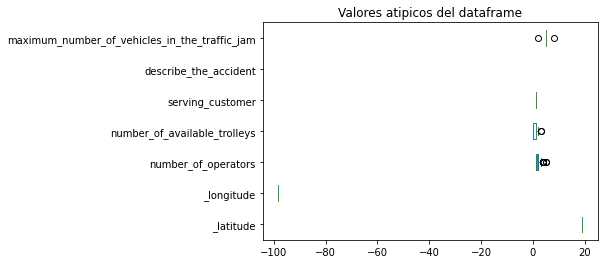

In [10]:
#realizamos diagrama de caja o bigote de cada columna 
fig=plt.figure(figsize=(15,8))
data2.plot(kind='box',vert=False)
plt.title("Valores atipicos del dataframe")
plt.show()

In [11]:
fitrocualitativo=data.iloc[:,[0,1,2,3,5,6,7,8,10,13,17,18,21,22,23,25,26]]

In [12]:
fitrocuantitativo=data.iloc[:,[4,9,11,12,14,15,16,19,20,24]]

In [13]:
#Metodo aplicando la desviacion estandar. eencontramos los valores extremos 
y=fitrocuantitativo
Limite_superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite Inferior permitido", Limite_Inferior)

Limite superior permitido number_of_operators    4.236537
dtype: float64
Limite Inferior permitido number_of_operators   -0.884889
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [21]:
#EEncontramos los outlieas de data frame 
outliers=fitrocuantitativo[(y>Limite_superior)|(y<Limite_Inferior)]
outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


_geometry company_if_visible type_of_vehicle  number_of_operators  \
0         NaN                NaN             NaN                  NaN   
1         NaN                NaN             NaN                  NaN   
2         NaN                NaN             NaN                  NaN   
3         NaN                NaN             NaN                  NaN   
4         NaN                NaN             NaN                  NaN   
..        ...                ...             ...                  ...   
177       NaN                NaN             NaN                  NaN   
178       NaN                NaN             NaN                  NaN   
179       NaN                NaN             NaN                  NaN   
180       NaN                NaN             NaN                  NaN   
181       NaN                NaN             NaN                  NaN   

    type_of_cargo picture_of_the_parked_freight_vehicle  \
0             NaN                                   NaN   
1             NaN                                   NaN   
2             NaN                                   NaN   
3             NaN                                   NaN   
4             NaN                                   NaN   
..            ...                                   ...   
177           NaN                                   NaN   
178           NaN                                   NaN   
179           NaN                                   NaN   
180           NaN                                   NaN   
181           NaN                                   NaN   

    departure_of_the_freight_vehicle used_traffic_cone  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
..                               ...               ...   
177                              NaN               NaN   
178                              NaN               NaN   
179                              NaN               NaN   
180                              NaN               NaN   
181                              NaN               NaN   

    vehicles_unloading_door accident  
0                       NaN      NaN  
1                       NaN      NaN  
2                       NaN      NaN  
3                       NaN      NaN  
4                       NaN      NaN  
..                      ...      ...  
177                     NaN      NaN  
178                     NaN      NaN  
179                     NaN      NaN  
180                     NaN      NaN  
181                     NaN      NaN  

[182 rows x 10 columns]

In [22]:
#Obtenemos datos y los outliers se convierten en nulos del df
data3=fitrocuantitativo[(y<=Limite_superior)&(y>=Limite_Inferior)]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


_geometry company_if_visible type_of_vehicle  number_of_operators  \
0         NaN                NaN             NaN                  1.0   
1         NaN                NaN             NaN                  2.0   
2         NaN                NaN             NaN                  1.0   
3         NaN                NaN             NaN                  1.0   
4         NaN                NaN             NaN                  2.0   
..        ...                ...             ...                  ...   
177       NaN                NaN             NaN                  1.0   
178       NaN                NaN             NaN                  1.0   
179       NaN                NaN             NaN                  1.0   
180       NaN                NaN             NaN                  2.0   
181       NaN                NaN             NaN                  2.0   

    type_of_cargo picture_of_the_parked_freight_vehicle  \
0             NaN                                   NaN   
1             NaN                                   NaN   
2             NaN                                   NaN   
3             NaN                                   NaN   
4             NaN                                   NaN   
..            ...                                   ...   
177           NaN                                   NaN   
178           NaN                                   NaN   
179           NaN                                   NaN   
180           NaN                                   NaN   
181           NaN                                   NaN   

    departure_of_the_freight_vehicle used_traffic_cone  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
..                               ...               ...   
177                              NaN               NaN   
178                              NaN               NaN   
179                              NaN               NaN   
180                              NaN               NaN   
181                              NaN               NaN   

    vehicles_unloading_door accident  
0                       NaN      NaN  
1                       NaN      NaN  
2                       NaN      NaN  
3                       NaN      NaN  
4                       NaN      NaN  
..                      ...      ...  
177                     NaN      NaN  
178                     NaN      NaN  
179                     NaN      NaN  
180                     NaN      NaN  
181                     NaN      NaN  

[182 rows x 10 columns]

In [25]:
#Remlazamos valores atipico (nulos) del df con "mean"
#Realizamos una copia del df
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data.mean(),1))
data_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


_geometry company_if_visible type_of_vehicle  number_of_operators  \
0         NaN                NaN             NaN                  1.0   
1         NaN                NaN             NaN                  2.0   
2         NaN                NaN             NaN                  1.0   
3         NaN                NaN             NaN                  1.0   
4         NaN                NaN             NaN                  2.0   
..        ...                ...             ...                  ...   
177       NaN                NaN             NaN                  1.0   
178       NaN                NaN             NaN                  1.0   
179       NaN                NaN             NaN                  1.0   
180       NaN                NaN             NaN                  2.0   
181       NaN                NaN             NaN                  2.0   

    type_of_cargo picture_of_the_parked_freight_vehicle  \
0             NaN                                   NaN   
1             NaN                                   NaN   
2             NaN                                   NaN   
3             NaN                                   NaN   
4             NaN                                   NaN   
..            ...                                   ...   
177           NaN                                   NaN   
178           NaN                                   NaN   
179           NaN                                   NaN   
180           NaN                                   NaN   
181           NaN                                   NaN   

    departure_of_the_freight_vehicle used_traffic_cone  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
..                               ...               ...   
177                              NaN               NaN   
178                              NaN               NaN   
179                              NaN               NaN   
180                              NaN               NaN   
181                              NaN               NaN   

    vehicles_unloading_door accident  
0                       NaN      NaN  
1                       NaN      NaN  
2                       NaN      NaN  
3                       NaN      NaN  
4                       NaN      NaN  
..                      ...      ...  
177                     NaN      NaN  
178                     NaN      NaN  
179                     NaN      NaN  
180                     NaN      NaN  
181                     NaN      NaN  

[182 rows x 10 columns]

In [26]:
#metodo aplicando cuartiles Encuentro cuartiles 0.25 y 0.75
y=fitrocuantitativo

percentile25=y.quantile(0.25)#Q1
percentile75=y.quantile(0.75)#Q3
iqr= percentile75 - percentile25

Limite_superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_superior)
print("Limite Inferior permitido", Limite_Inferior)

Limite superior permitido number_of_operators    4.236537
dtype: float64
Limite Inferior permitido number_of_operators   -0.884889
dtype: float64


In [18]:
#Encontramos outliears del df
outliers_iqr=fitrocuantitativo[(y>Limite_superior)|(y<Limite_Inferior)]
outliers_iqr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


_geometry company_if_visible type_of_vehicle  number_of_operators  \
0         NaN                NaN             NaN                  NaN   
1         NaN                NaN             NaN                  NaN   
2         NaN                NaN             NaN                  NaN   
3         NaN                NaN             NaN                  NaN   
4         NaN                NaN             NaN                  NaN   
..        ...                ...             ...                  ...   
177       NaN                NaN             NaN                  NaN   
178       NaN                NaN             NaN                  NaN   
179       NaN                NaN             NaN                  NaN   
180       NaN                NaN             NaN                  NaN   
181       NaN                NaN             NaN                  NaN   

    type_of_cargo picture_of_the_parked_freight_vehicle  \
0             NaN                                   NaN   
1             NaN                                   NaN   
2             NaN                                   NaN   
3             NaN                                   NaN   
4             NaN                                   NaN   
..            ...                                   ...   
177           NaN                                   NaN   
178           NaN                                   NaN   
179           NaN                                   NaN   
180           NaN                                   NaN   
181           NaN                                   NaN   

    departure_of_the_freight_vehicle used_traffic_cone  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
..                               ...               ...   
177                              NaN               NaN   
178                              NaN               NaN   
179                              NaN               NaN   
180                              NaN               NaN   
181                              NaN               NaN   

    vehicles_unloading_door accident  
0                       NaN      NaN  
1                       NaN      NaN  
2                       NaN      NaN  
3                       NaN      NaN  
4                       NaN      NaN  
..                      ...      ...  
177                     NaN      NaN  
178                     NaN      NaN  
179                     NaN      NaN  
180                     NaN      NaN  
181                     NaN      NaN  

[182 rows x 10 columns]

In [28]:
#obtenemos datos limpios 
data4_iqr=fitrocuantitativo[(y<=Limite_superior)&(y>=Limite_Inferior)]
data4_iqr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


_geometry company_if_visible type_of_vehicle  number_of_operators  \
0         NaN                NaN             NaN                  1.0   
1         NaN                NaN             NaN                  2.0   
2         NaN                NaN             NaN                  1.0   
3         NaN                NaN             NaN                  1.0   
4         NaN                NaN             NaN                  2.0   
..        ...                ...             ...                  ...   
177       NaN                NaN             NaN                  1.0   
178       NaN                NaN             NaN                  1.0   
179       NaN                NaN             NaN                  1.0   
180       NaN                NaN             NaN                  2.0   
181       NaN                NaN             NaN                  2.0   

    type_of_cargo picture_of_the_parked_freight_vehicle  \
0             NaN                                   NaN   
1             NaN                                   NaN   
2             NaN                                   NaN   
3             NaN                                   NaN   
4             NaN                                   NaN   
..            ...                                   ...   
177           NaN                                   NaN   
178           NaN                                   NaN   
179           NaN                                   NaN   
180           NaN                                   NaN   
181           NaN                                   NaN   

    departure_of_the_freight_vehicle used_traffic_cone  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
..                               ...               ...   
177                              NaN               NaN   
178                              NaN               NaN   
179                              NaN               NaN   
180                              NaN               NaN   
181                              NaN               NaN   

    vehicles_unloading_door accident  
0                       NaN      NaN  
1                       NaN      NaN  
2                       NaN      NaN  
3                       NaN      NaN  
4                       NaN      NaN  
..                      ...      ...  
177                     NaN      NaN  
178                     NaN      NaN  
179                     NaN      NaN  
180                     NaN      NaN  
181                     NaN      NaN  

[182 rows x 10 columns]

In [29]:
#remplazamos los valores atipicos por nulos del df
data4_iqr=data3.copy()
data_iqr=data_clean.fillna(round(data4_iqr.mean(),1))
data_iqr

_geometry  company_if_visible  type_of_vehicle  number_of_operators  \
0          NaN                 NaN              NaN                  1.0   
1          NaN                 NaN              NaN                  2.0   
2          NaN                 NaN              NaN                  1.0   
3          NaN                 NaN              NaN                  1.0   
4          NaN                 NaN              NaN                  2.0   
..         ...                 ...              ...                  ...   
177        NaN                 NaN              NaN                  1.0   
178        NaN                 NaN              NaN                  1.0   
179        NaN                 NaN              NaN                  1.0   
180        NaN                 NaN              NaN                  2.0   
181        NaN                 NaN              NaN                  2.0   

     type_of_cargo  picture_of_the_parked_freight_vehicle  \
0              NaN                                    NaN   
1              NaN                                    NaN   
2              NaN                                    NaN   
3              NaN                                    NaN   
4              NaN                                    NaN   
..             ...                                    ...   
177            NaN                                    NaN   
178            NaN                                    NaN   
179            NaN                                    NaN   
180            NaN                                    NaN   
181            NaN                                    NaN   

     departure_of_the_freight_vehicle  used_traffic_cone  \
0                                 NaN                NaN   
1                                 NaN                NaN   
2                                 NaN                NaN   
3                                 NaN                NaN   
4                                 NaN                NaN   
..                                ...                ...   
177                               NaN                NaN   
178                               NaN                NaN   
179                               NaN                NaN   
180                               NaN                NaN   
181                               NaN                NaN   

     vehicles_unloading_door  accident  
0                        NaN       NaN  
1                        NaN       NaN  
2                        NaN       NaN  
3                        NaN       NaN  
4                        NaN       NaN  
..                       ...       ...  
177                      NaN       NaN  
178                      NaN       NaN  
179                      NaN       NaN  
180                      NaN       NaN  
181                      NaN       NaN  

[182 rows x 10 columns]

In [30]:
#Convertir en dataframe
data_iqr.to_csv("Datos_limpios")
#descargamos archivo
from google.colab import files 

files.download("Datos_limpios")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>